## Calculate a Spectrum of a Gold Sphere using the DDA

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Step 1: Define shape and make directories
Set the lattice spacing and radius of the sphere, and make the input files in the following lines. 

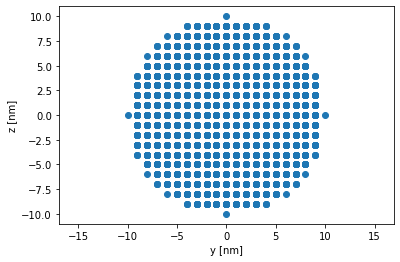

In [2]:
from make_sphere import Generate_Sphere

lat_space = 1 # lattice spacing in nm
radius = 10 # radius of sphere in nm

gen_shape = Generate_Sphere(lat_space=lat_space, radius_nm=radius)
gen_shape.write_shape() # write the shape to a file
gen_shape.plot_shape() # plots the shape

In [3]:
# Delete any previously run folders
from make_dirs import make_directories
import shutil
import glob

files = glob.glob('*um')
for f in files:
    shutil.rmtree(f)
    
files = glob.glob('*eV')
for f in files:
    shutil.rmtree(f)

### Step 2: Make directories
After the shape is made, edit `ddscat.par` according to the `README.md`. (Once you've edited `ddscat.par` appropriately, the function `make_directories` will make `num` number of folders which will contain your scattering calculations for each wavelength / energy.

In [4]:
from make_dirs import make_directories

make_directories(intermsof='um', # eV or nm, only eV for now
                 start=0.4, # start spectrum at 2.0 eV
                 finish=0.7, # end spectrum at 3.0 eV
                 num=21 # 50 points in between 
                )

### Step 3: Run the optical calculation
Change this path to where you've kept the `g-dda` executables. This will run all the `num` number of calculations. On a laptop, it should take less than a minute. 

In [5]:
%%bash
for i in *um ; do
    cd $i
    ../../../../g-dda/source_code/ddscat &> output.txt
    cd ../
done

### Step 4: Collect the data into one file.
Once the calculation has finished (should take less than a minute). The following cell will collect all the results and put them in a single file, `Spectrum`

In [6]:
%%bash
# Collect all the files and write it to a file named Spectrum
for i in *um ;do
    cd $i
    cp qtable temp
    sed -i -e "1,14d" temp
    cat temp >>../Spectrum
    rm temp
    cd ../
done


### Step 5: Plot the spectrum and find resonance.
The last step is to plot the results of the simulation.

Resonance at 505 nm


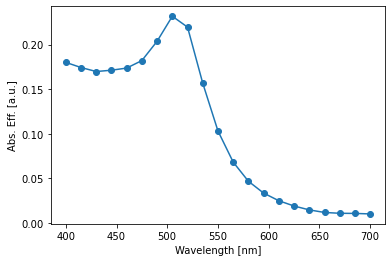

In [11]:
spectrum = np.loadtxt('Spectrum')
plt.plot(spectrum[:,1]*1000, spectrum[:,3], marker='o')
plt.xlabel('Wavelength [nm]')
plt.ylabel('Abs. Eff. [a.u.]')
idx = np.where(spectrum[:,3] == max(spectrum[:,3]))
max_wave = spectrum[idx,1][0][0]
print('Resonance at', int(np.round(max_wave*1000)), 'nm')